<a href="https://colab.research.google.com/github/percylinhai/Coursera_Capstone/blob/master/Capstone_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data-based recommendation on location for Houston restaurant business owners

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#method)
* [Analysis and Results](#analysis)
* [Conclusion](#conclusion)
* [Discussion](#discussion)


##Introduction: Business Problem<a name="introduction"></a>

When it comes to brick-and-mortal businesses, what always come on top of business owners' mind is location. In this project, we will be specifically focusing on restaurant businesses in the city of Houston, where a wide variety of foods and cuisines can thrive.

An ideal location for a restaurant should be a great combination of reasonable cost (land/rent/utilities/personnel etc.), abundant customer traffic, nice neighborhood and relatively low competition.

However, in reality, the decisions on location are usually not done well-informed, with the limit of time and data. Besides, several important factors may not appear as apparent as others and can be easily neglected during the real selection process. Therefore, it is valuable to provide a data-driven recommendation for location pick to help business owners make a evidence-based decision.

Here, I will leverage the Foursquare API and other sources of data to depict a detailed profile of each neighborhood in Houston. Based on the profile data from other similar metropolitan cities, I will model this problem into a supervised learning model using most widely used classification models. The best prediction model will then be used to generate predictions on the neighborthoods in Houston about whether they are good choices for restaurant businesses. The whole process is driven by objective data and the final recommendation will therefore be completely data-driven. In more detail, I will also interpret the predicting model to generate the most important features for selecting the right neighborhood for the restaurant business, which can be used for future considerations.

##Data Description<a name="data"></a>

We will use data from four cities: Houston, Los Angeles, Dallas, and NYC. All of them are big cities with variety, one in the north, the other three in the south. With these similarities, we hope to capture some core features that are critical to restaurant businesses, from which we can build a reliable prediction model. We will be primarily using venue category data from Foursquare API. The venue category data will be used as important features describing the neighborhoods. Besides, we will also include other features such as housing rate, foot traffic, demographics and so on.

More specifically, for a total of four cities (Houston, Los Angeles, Dallas, and NYC), the data we will use include:
1. Full neighborhood list and corresponding geographic coordinates. (e.g. (40.586314, -74.190737))
2. Venue category data from Foursquare API. (e.g. "Spa", "Supermarket" etc.)
3. I was also able to find some social-economic data for each neighborhood in [geocod.io](https://), include: household type, housing prices, family composition, demographics and income. (e.g. Household type: Family, Non-family; Family composition: Married couple, Singles etc. For different types, there will be absolute counts and percentage data for a neighborhood.)




Together, we will be able to depict a rather detailed picture about the fitness to open a restaurant in a neighborhood.

##Methodology<a name="method"></a>

Because this will be modeled as a __classification problem__, we will assign labels to neighborhoods of Los Angeles, Dallas, and NYC indicating whether the area is a good place to have a restaurant business. For simplicity, we will use the percentage of total venues that are restaurant as the indicator. Here, we will set the cut-off value as 30%, meaning that if a neighborhood has more than 30% of venues being restaurant, we will say it is a good place to have a restaurant business and the label "1" will be assigned. Otherwise, label "0" will be assigned.

The data from the four cities will be split into training and test. Columns and rows with high missing rate will be removed. Any apparent outliers will be removed. We will adopt some most well-known models: __Random Forest__, __Logistic Regression__ and __Support Vector Machines__ to model this problem.

We will pick out the model with the highest accuracy on test data and apply it to the Houston dataset. We will dig deeper to interpret the prediction results to extract key insights in picking locations for restaurants.

##Analysis and Results<a name="analysis"></a>

###The first step is to get the neighborhood list for these two cities.

####For LA first, we can mine for neighborhood list using wiki link: https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles

In [0]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [0]:
url_LA='https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles'
r=requests.get(url_LA)
LA_soup=BeautifulSoup(r.text,'html.parser')

In [0]:
#print(LA_soup.prettify())

In [6]:
neighborhoods_LA_list=[]
for link in LA_soup.find_all('li'):
  if link.a and 'title' in link.a.attrs:
    raw_name=link.a.attrs['title'] 
    if 'Los Angeles' not in raw_name:
      neighborhoods_LA_list.append(raw_name)
    else:
      neighborhoods_LA_list.append(raw_name.split(',')[0])
last_neighbor='Yucca Corridor'
last_index=neighborhoods_LA_list.index(last_neighbor)
del neighborhoods_LA_list[last_index+1:]
print(neighborhoods_LA_list)

['Angelino Heights', 'Arleta', 'Arlington Heights', 'Arts District', 'Atwater Village', 'Baldwin Hills', 'Baldwin Hills/Crenshaw', 'Baldwin Village', 'Baldwin Vista', 'Beachwood Canyon', 'Bel Air', 'Benedict Canyon', 'Beverly Crest', 'Beverly Glen', 'Beverly Grove', 'Beverly Hills Post Office', 'Beverly Park', 'Beverlywood', 'Boyle Heights', 'Brentwood', 'Brentwood Circle', 'Brentwood Glen', 'Broadway-Manchester', 'Brookside', 'Bunker Hill', 'Cahuenga Pass', 'Canoga Park', 'Harvard Park', 'Carthay', 'Castle Heights', 'Central-Alameda', 'Downtown Los Angeles', 'Century City', 'Chatsworth', 'Chesterfield Square', 'Cheviot Hills', 'Chinatown', 'Civic Center', 'Crenshaw', 'Crestwood Hills', 'Cypress Park', 'Del Rey', 'Downtown Los Angeles', 'Eagle Rock', 'East Gate Bel Air', 'East Hollywood', 'Echo Park', 'Edendale', 'El Sereno', 'Elysian Heights', 'Elysian Park', 'Elysian Valley', 'Encino', 'Exposition Park', 'Faircrest Heights', 'Fairfax District', 'Fashion District', 'Historic Filipinot

In [7]:
LA_df=pd.DataFrame({'Neighborhood':neighborhoods_LA_list,'City':'Los Angeles'})
LA_df.head()

,Neighborhood,City
0,Angelino Heights,Los Angeles
1,Arleta,Los Angeles
2,Arlington Heights,Los Angeles
3,Arts District,Los Angeles
4,Atwater Village,Los Angeles


####Next is Dallas:

In [0]:
url_Dallas='https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Dallas'
r=requests.get(url_Dallas)
Dallas_soup=BeautifulSoup(r.text,'html.parser')

In [0]:
#print(Dallas_soup.prettify)

In [10]:
Dallas_neighborhood_list=[]
for link in Dallas_soup.find_all('a'):
  if 'title' in link.attrs:
    #print(link.attrs['title'])
    raw_name=link.attrs['title']
    if ',' in raw_name:
      Dallas_neighborhood_list.append(raw_name.split(',')[0].strip())
    elif '(' in raw_name:
      Dallas_neighborhood_list.append(raw_name.split('(')[0].strip())
    else:
      Dallas_neighborhood_list.append(raw_name)
first_index=Dallas_neighborhood_list.index('Downtown Dallas')
last_index=Dallas_neighborhood_list.index('Westmoreland Heights')
del Dallas_neighborhood_list[:first_index]
del Dallas_neighborhood_list[last_index+1:]
remove_list=['Downtown Dallas','East Dallas','Old East Dallas','Northeast Dallas','North Dallas','Far North Dallas','Northwest Dallas',\
             'Oak Cliff Area','Redbird','Oak Lawn','Southeast Dallas','Far South Dallas','South Central Dallas',\
             'Old South Dallas/Fair Park','West Dallas']
for x in remove_list:
  try:
    Dallas_neighborhood_list.remove(x)
  except:
    pass
print(Dallas_neighborhood_list)
    

['Baylor District', 'Cedars', 'Civic Center District', 'Arts District', 'Dallas Farmers Market', 'Deep Ellum', 'Design District', 'Main Street District', 'Reunion District', 'Riverfront District', 'South Side', 'City Center District', 'Uptown', 'Victory Park', 'West End Historic District', 'Alger Park/Ash Creek', 'Belmont', 'Buckner Terrace', 'Caruth Terrace', 'Casa Linda Estates', 'Casa Linda Park', 'Casa View', 'Casa View Haven', 'Claremont', 'Claremont Park', 'Eastwood', 'Edgemont Park', 'Forest Hills', 'Gaston Park', 'Greenland Hills', 'Hillridge', 'Hollywood Heights', 'Junius Heights', 'Lake Park Estates', 'Lakewood', 'Lakewood Heights', 'Lakewood Trails', 'Little Forest Hills', 'Lochwood', 'Lower Greenville', 'North Stonewall Terrace', 'Old Lake Highlands', 'Ridgewood Park', 'Santa Monica', 'Stonewall Terrace', 'University Meadows', 'Vickery Place', 'White Rock', 'Wilshire Heights', 'Baylor/Meadows', 'Belmont Park', 'Bryan Place', 'Deep Ellum', 'Munger Place Historic District', "

In [11]:
Dallas_df=pd.DataFrame({'Neighborhood':Dallas_neighborhood_list,'City':'Dallas'})
Dallas_df.head()

,Neighborhood,City
0,Baylor District,Dallas
1,Cedars,Dallas
2,Civic Center District,Dallas
3,Arts District,Dallas
4,Dallas Farmers Market,Dallas


####Houston neighborhoods

In [0]:
url_hou='https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods'
r=requests.get(url_hou)
Houston_soup=BeautifulSoup(r.text,'html.parser')

In [0]:
#print(Houston_soup.prettify)

In [14]:
Houston_neighbor_list=[]
counter=0
for link in Houston_soup.find_all('td'):
  counter+=1
  if counter%4==2:
    raw=link.contents[0]
    raw_name=''
    if raw.name=='a':
      raw_name=raw.attrs['title']
    elif raw.name is None:
      raw_name=raw.strip()
    if ',' in raw_name:
      raw_name=raw_name.split(',')[0].strip()
    if '(' in raw_name:
      raw_name=raw_name.split('(')[0].strip()
    if raw_name[-1]=='/':
      raw_name=raw_name[:-1].strip()
    Houston_neighbor_list.append(raw_name)
    if raw_name=='Lawndale / Wayside': #last one
      break
print(Houston_neighbor_list)

['Willowbrook', 'Greenspoint', 'Carverdale', 'Fairbanks', 'Inwood Forest', 'Acres Homes', 'Hidden Valley', 'Westbranch', 'Addicks', 'Spring Branch', 'Langwood', 'Central Northwest', 'Independence Heights', 'Lazybrook/Timbergrove', 'Houston Heights', 'Memorial', 'Eldridge / West Oaks', 'Briar Forest', 'Westchase', 'Mid-West', 'Uptown Houston', 'Washington Avenue', 'Afton Oaks', 'Neartown Houston', 'Alief', 'Sharpstown', 'Gulfton', 'West University Place', 'Westwood', 'Braeburn', 'Meyerland', 'Braeswood Place', 'Texas Medical Center', 'NRG Park', 'South Main', 'Brays Oaks', 'Westbury', 'Willow Meadows / Willowbend', 'Fondren Gardens', 'Central Southwest', 'Fort Bend / Houston', 'George Bush Intercontinental Airport', 'Kingwood', 'Lake Houston', 'Northside / Northline', 'Eastex - Jensen', 'East Little York / Homestead', 'Trinity / Houston Gardens', 'East Houston', 'Settegast', 'Near Northside', 'Kashmere Gardens', 'El Dorado / Oates Prairie', 'Hunterwood', 'Fifth Ward', 'Denver Harbor', '

In [15]:
Houston_neighbor_df=pd.DataFrame({'Neighborhood':Houston_neighbor_list,'City':'Houston'})
Houston_neighbor_df.shape

(88, 2)

In [0]:
Houston_neighbor_df.to_csv('Houston_neighborhoods.csv',index=False)

###Then, let's try to get some coordinates and save them for later use.

It seems that the geocoder does not work, so we first save the neighborhood list for the cities.

In [0]:
LA_df.to_csv('LA_neighborhoods.csv',index=False)

In [19]:
LA_df.shape

(195, 2)

In [20]:
Dallas_df.to_csv('Dallas_neighborhoods.csv',index=False)
Dallas_df.shape

(216, 2)

Instead we used other online tools to do geocoding. Here, we used [geocod.io](https://geocod.io) to code coordinates, besides, some social economic data is also availabel for neighborhoods. And we load the annotated neighborhood data.

In [93]:
LA_ann_df=pd.read_csv('LA_neighborhoods_annotate.csv')
LA_ann_df.shape

(195, 524)

Then, we need to do some preprocessing for the loaded data. We will calculate the missingness of each column, remove columns and rows with high proportion of missing data. And only keep selected columns as the potential features. 

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
def data_preprocess(df):
  #Drop certain columns
  drop_columns=[]
  candidate_drop_columns=['Accuracy Type','Number', 'Street', 'City.1', 'State', 'County',
       'Zip', 'Country', 'Source',]
  for column in df.columns.values:
    if column in candidate_drop_columns:
      drop_columns.append(column)
    elif 'Margin of error' in column:
      drop_columns.append(column)
  df.drop(columns=drop_columns,inplace=True)
  #Drop columns with high missing rate
  missing_values = missing_values_table(df)
  high_missing_columns=missing_values[missing_values['% of Total Values']>50].index
  df.drop(columns=high_missing_columns,inplace=True)
  #Only keep percentage columns as absolute values may vary in different cities
  percentage_columns=[]
  for column in df.columns.values:
    if 'Percent' in column:
      percentage_columns.append(column)
  kept_columns=list(df.columns.values[:5])+percentage_columns
  df=df[kept_columns]
  #Drop rows with low geocode accuracy
  if 'Accuracy Score' in df.columns:
    low_accu_idx=df[df['Accuracy Score']<0.5].index
    df.drop(low_accu_idx,inplace=True)
    df.reset_index()
  #Drop rows with high missing rate
  miss_by_row=df.isnull().sum(axis=1)/len(df.columns.values)
  highmiss_idx=df.index[miss_by_row>0.5]
  df.drop(highmiss_idx,inplace=True)
  df.reset_index()
  return df


In [96]:
LA_ann_preprocessed_df=data_preprocess(LA_ann_df)

Your selected dataframe has 350 columns.
There are 339 columns that have missing values.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
LA_ann_preprocessed_df.shape

(124, 158)

In [33]:
Dallas_ann_df=pd.read_csv('Dallas_neighborhoods_annotate.csv')
Dallas_ann_df.shape

(216, 512)

In [34]:
Dallas_ann_preprocessed_df=data_preprocess(Dallas_ann_df)
Dallas_ann_preprocessed_df.shape

Your selected dataframe has 338 columns.
There are 329 columns that have missing values.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(135, 158)

In [35]:
NYC_ann_df=pd.read_csv('NYC_neighborhoods_annotate.csv')
NYC_ann_df.shape

(306, 500)

In [45]:
NYC_ann_preprocessed_df=data_preprocess(NYC_ann_df)
NYC_ann_preprocessed_df.shape

Your selected dataframe has 326 columns.
There are 318 columns that have missing values.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(279, 158)

In [198]:
Houston_ann_df=pd.read_csv('Houston_community_annotate.csv')
Houston_ann_preprocessed_df=data_preprocess(Houston_ann_df)
Houston_ann_preprocessed_df.shape

Your selected dataframe has 323 columns.
There are 318 columns that have missing values.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(43, 158)

###Next, we should use the coordinates to get venue categories from Foursquare.

In [0]:
CLIENT_ID = 'MLZRPLY4ARZ42YPJGENLB4DNORKL1HAFRCUORSJMVQSTZ2CC' 
CLIENT_SECRET = 'AZDRXOJ5RFYBGRBVCLF5I12MYWNHSSOX1CZCPAS5YAWUIEG1'
VERSION = '20180605' # Foursquare API version
radius=500
limit=100

In [0]:
def getNearbyVenues( names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
LA_venues=getNearbyVenues(LA_ann_preprocessed_df['Neighborhood'],LA_ann_preprocessed_df['Latitude'],LA_ann_preprocessed_df['Longitude'])

Angelino Heights
Arlington Heights
Atwater Village
Baldwin Hills
Baldwin Village
Baldwin Vista
Beachwood Canyon
Benedict Canyon
Beverly Crest
Beverly Glen
Beverly Grove
Beverly Hills Post Office
Beverly Park
Beverlywood
Brentwood
Brentwood Circle
Brentwood Glen
Broadway-Manchester
Brookside
Cahuenga Pass
Castle Heights
Central-Alameda
Century City
Chesterfield Square
Cheviot Hills
Civic Center
Del Rey
Eagle Rock
East Hollywood
Echo Park
Edendale
El Sereno
Elysian Heights
Elysian Park
Elysian Valley
Exposition Park
Fairfax District
Florence
Los Angeles Flower District
Franklin Hills
Glassell Park
Gramercy Park
Granada Hills
Griffith Park
Hancock Park
Harbor City
Harbor Gateway
Highland Park
Hollywood Hills
Hollywood Hills West
Holmby Hills
Hyde Park
Jefferson Park
Kinney Heights
Lafayette Square
Larchmont
Laurel Canyon
Lincoln Heights
Little Armenia
Little Ethiopia
Little Tokyo
Los Feliz
Manchester Square
Mandeville Canyon
Melrose Hill
Mid-City
Mid-Wilshire
Miracle Mile
Mission Hills
Mo

In [0]:
LA_venues.drop(LA_venues[LA_venues['Venue Category']=='Neighborhood'].index,inplace=True)

One-hot encoding for venue categories.

In [51]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

#add back Neighborhood
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,...,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Trail,Train,Train Station,Tree,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Angelino Heights,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Angelino Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Angelino Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Angelino Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Angelino Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
LA_mean_venue=LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_mean_venue.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,...,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Trail,Train,Train Station,Tree,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Angelino Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arlington Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Atwater Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.181818,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Baldwin Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Baldwin Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
restaurant_columns=[x for x in LA_mean_venue.columns.values if 'Restaurant' in x]
LA_mean_venue['Cuisine_sum']=LA_mean_venue[restaurant_columns].sum(axis=1)
LA_mean_venue['Cuisine_sum'].describe()

count    119.000000
mean       0.194659
std        0.170295
min        0.000000
25%        0.000000
50%        0.200000
75%        0.280788
max        0.846154
Name: Cuisine_sum, dtype: float64

We will assign label values to neighborhoods indicating whether this neighborhood is considered a good option for restaurant business. Here we will take any neighborhood with a total proportion of restaurant over 30% to be a good option (i.e. label=1).

In [54]:
LA_mean_venue['Label']=0
LA_mean_venue.loc[LA_mean_venue['Cuisine_sum']>0.3,'Label']=1
LA_mean_venue.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,...,Steakhouse,Storage Facility,Street Art,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Trail,Train,Train Station,Tree,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Cuisine_sum,Label
0,Angelino Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0
1,Arlington Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,Atwater Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.181818,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227273,0
3,Baldwin Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,1
4,Baldwin Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,1


In [59]:
LA_combined_df=LA_ann_preprocessed_df.merge(LA_mean_venue,how='inner',on='Neighborhood')
LA_combined_df.shape

(124, 442)

In [0]:
LA_combined_df.to_csv('LA_neighbor_combined.csv',index=False)

Let's do the same thing for Dallas.

In [64]:
Dallas_venues=getNearbyVenues(Dallas_ann_preprocessed_df['Neighborhood'],Dallas_ann_preprocessed_df['Latitude'],Dallas_ann_preprocessed_df['Longitude'])

Baylor District
Dallas Farmers Market
Main Street District
South Side
City Center District
Victory Park
Belmont
Caruth Terrace
Claremont
Claremont Park
Eastwood
Edgemont Park
Forest Hills
Gaston Park
Greenland Hills
Hillridge
Hollywood Heights
Junius Heights
Lakewood
Lakewood Heights
Lakewood Trails
Old Lake Highlands
Ridgewood Park
Santa Monica
Stonewall Terrace
University Meadows
Vickery Place
White Rock
Wilshire Heights
Belmont Park
Bryan Place
Munger Place Historic District
Peak's Suburban Addition
Swiss Avenue
Abrams Place
Alexander's Village
Boundbrook Oaks Estates
Chimney Hill
Copperfield Community
Country Forest
Forest Highlands
Glen Oaks
Hamilton Park
Highlands West
Highland Meadows
High Oaks Addition
Jackson Meadow
L Streets
Lake Highlands
Lake Highlands Estates
Lake Highlands North
Lake Highlands Square
Merriman Park Estates
Merriman Park North
Moss Farm
Moss Meadows
Oak Highlands
Oak Tree Village
Pebble Creek
Richland Park Estates
Rolling Trails
Royal Lane Village
Walnut Cr

In [65]:
Dallas_venues.drop(Dallas_venues[Dallas_venues['Venue Category']=='Neighborhood'].index,inplace=True)
# one hot encoding
Dallas_onehot = pd.get_dummies(Dallas_venues[['Venue Category']], prefix="", prefix_sep="")

#add back Neighborhood
Dallas_onehot['Neighborhood'] = Dallas_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Dallas_onehot.columns[-1]] + list(Dallas_onehot.columns[:-1])
Dallas_onehot = Dallas_onehot[fixed_columns]
Dallas_mean_venue=Dallas_onehot.groupby('Neighborhood').mean().reset_index()
# get restaurant info
restaurant_columns=[x for x in Dallas_mean_venue.columns.values if 'Restaurant' in x]
Dallas_mean_venue['Cuisine_sum']=Dallas_mean_venue[restaurant_columns].sum(axis=1)
Dallas_mean_venue['Cuisine_sum'].describe()

count    123.000000
mean       0.138205
std        0.178984
min        0.000000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: Cuisine_sum, dtype: float64

In [66]:
Dallas_mean_venue['Label']=0
Dallas_mean_venue.loc[Dallas_mean_venue['Cuisine_sum']>0.3,'Label']=1
Dallas_mean_venue.head()

,Neighborhood,ATM,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,...,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Cuisine_sum,Label
0,Abrams Place,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.25,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
1,Alexander's Village,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.400000,1
2,Alta Park,0.0,0.0,0.012658,0.0,0.0,0.0,0.0,0.012658,0.0,0.0,0.0,0.012658,0.012658,0.0,0.012658,0.0,0.063291,0.0,0.0,0.0,0.0,0.025316,0.0,0.0,0.0,0.012658,0.0,0.0,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.012658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.012658,0.012658,0.012658,0.050633,0.0,0.0,0.012658,0.00,0.012658,0.0,0.0,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.0,0.0,0.012658,0.0,0.012658,0.012658,0.0,0.012658,0.227848,0
3,Arcadia Park,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
4,Arlington Park,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.166667,0


In [67]:
Dallas_combined_df=Dallas_ann_preprocessed_df.merge(Dallas_mean_venue,how='inner',on='Neighborhood')
Dallas_combined_df.to_csv('Dallas_neighbor_combined.csv',index=False)
Dallas_combined_df.shape

(125, 374)

In [68]:
NYC_venues=getNearbyVenues(NYC_ann_preprocessed_df['Neighborhood'],NYC_ann_preprocessed_df['Latitude'],NYC_ann_preprocessed_df['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Manhattan Terrace
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Sea Gate
Downtown
Boerum Hill
P

In [69]:
NYC_venues.drop(NYC_venues[NYC_venues['Venue Category']=='Neighborhood'].index,inplace=True)
# one hot encoding
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")

#add back Neighborhood
NYC_onehot['Neighborhood'] = NYC_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]
NYC_mean_venue=NYC_onehot.groupby('Neighborhood').mean().reset_index()
# get restaurant info
restaurant_columns=[x for x in NYC_mean_venue.columns.values if 'Restaurant' in x]
NYC_mean_venue['Cuisine_sum']=NYC_mean_venue[restaurant_columns].sum(axis=1)
NYC_mean_venue['Cuisine_sum'].describe()

count    275.000000
mean       0.200558
std        0.127811
min        0.000000
25%        0.100000
50%        0.200000
75%        0.280000
max        0.710526
Name: Cuisine_sum, dtype: float64

In [0]:
NYC_mean_venue['Label']=0
NYC_mean_venue.loc[NYC_mean_venue['Cuisine_sum']>0.3,'Label']=1
NYC_combined_df=NYC_ann_preprocessed_df.merge(NYC_mean_venue,how='inner',on='Neighborhood')

In [0]:
NYC_combined_df.to_csv('NYC_neighbor_combined.csv',index=False)

In [199]:
Houston_venues=getNearbyVenues(Houston_ann_preprocessed_df['Neighborhood'],Houston_ann_preprocessed_df['Latitude'],Houston_ann_preprocessed_df['Longitude'])

Fourth Ward
Pleasantville Area
Spring Branch East
Langwood
Lake Houston
South Belt / Ellington
Greenway / Upper Kirby Area
Edgebrook Area
Memorial
Settegast
Second Ward
Independence Heights
Westbranch
Clinton Park Tri-Community
Golfcrest / Bellfort / Reveille
Denver Harbor / Port Houston
Lazy Brook / Timbergrove
Kashmere Gardens
Northside Village
El Dorado / Oates Prairie
Westbury
Spring Branch Central
Hunterwood
South Main
Medical Center Area
East Houston
Hidden Valley
Gulfton
Fondren Gardens
South Acres / Crestmont Park
Brays Oaks
Central Southwest
Sunnyside
Westchase
Alief
Pecan Park
Clear Lake
South Park
Park Place
University Place
Spring Branch West
Braeswood Place
Afton Oaks / River Oaks Area


In [0]:
Houston_venues.drop(Houston_venues[Houston_venues['Venue Category']=='Neighborhood'].index,inplace=True)
# one hot encoding
Houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")

#add back Neighborhood
Houston_onehot['Neighborhood'] = Houston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]
Houston_mean_venue=Houston_onehot.groupby('Neighborhood').mean().reset_index()

Remember that we don't give labels to Houston neighborhoods.

In [0]:
Houston_combined_df=Houston_ann_preprocessed_df.merge(Houston_mean_venue,how='inner',on='Neighborhood')

Next, we need to align the dataframes so that they have the same columns. We will first align the training dataframes (LA, NYC and Dallas), then align the training and target dataframe (Houston).

In [79]:
print(LA_combined_df.shape,Dallas_combined_df.shape,NYC_combined_df.shape)
LA_combined_tmp_df,Dallas_combined_tmp_df=LA_combined_df.align(Dallas_combined_df,join='inner',axis=1)
print(LA_combined_tmp_df.shape,Dallas_combined_tmp_df.shape,NYC_combined_df.shape)
LA_combined_tmp_df,NYC_combined_tmp_df=LA_combined_tmp_df.align(NYC_combined_df,join='inner',axis=1)
print(LA_combined_tmp_df.shape,Dallas_combined_tmp_df.shape,NYC_combined_tmp_df.shape)
LA_combined_tmp_df,Dallas_combined_tmp_df=LA_combined_tmp_df.align(Dallas_combined_tmp_df,join='inner',axis=1)
print(LA_combined_tmp_df.shape,Dallas_combined_tmp_df.shape,NYC_combined_tmp_df.shape)

(124, 442) (125, 374) (278, 579)
(124, 333) (125, 333) (278, 579)
(124, 326) (125, 333) (278, 326)
(124, 326) (125, 326) (278, 326)


In [82]:
combined_labeled_df=LA_combined_tmp_df.append(Dallas_combined_tmp_df,ignore_index=True)
combined_labeled_df=combined_labeled_df.append(NYC_combined_tmp_df,ignore_index=True)
print(combined_labeled_df.shape)

(527, 326)


In [0]:
combined_labeled_df.to_csv('Combined_labeled_neighbor.csv',index=False)

In [202]:
print(combined_labeled_df.shape, Houston_combined_df.shape)
combined_labeled_aligned_df,Houston_combined_df=combined_labeled_df.align(Houston_combined_df,join='inner',axis=1)
combined_labeled_aligned_df['Cuisine_sum']=combined_labeled_df['Cuisine_sum']
combined_labeled_aligned_df['Label']=combined_labeled_df['Label']

(527, 326) (35, 259)


In [203]:
print(combined_labeled_df.shape, combined_labeled_aligned_df.shape)

(527, 326) (527, 243)


After the alignment, the output dataframes should be the final dataset we will work on to build machine learning models. Let's save them now.

In [204]:
combined_labeled_aligned_df.to_csv('Combined_labeled_aligned_neighbor.csv',index=False)
Houston_combined_df.to_csv('Houston_combined_aligned_neighbor.csv',index=False)
Houston_combined_df.shape

(35, 241)

###Now let's do machine learning modeling with classification on the data

First, load the data.

In [0]:
combined_labeled_aligned_df=pd.read_csv('Combined_labeled_aligned_neighbor.csv')

In [0]:
from sklearn.model_selection import cross_val_score,validation_curve,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pickle

Use train_test_split to split data into training and test segments.

In [0]:
train, test=train_test_split(combined_labeled_aligned_df, test_size=0.2, random_state=0)

In [207]:
print(train.shape,test.shape)
train.head()

(421, 243) (106, 243)


,Neighborhood,City,Latitude,Longitude,ACS Families/Household type by household/Family households/Percentage,ACS Families/Household type by household/Family households: Married-couple family/Percentage,ACS Families/Household type by household/Other family/Percentage,"ACS Families/Household type by household/Other family: Male householder, no wife present/Percentage","ACS Families/Household type by household/Other family: Female householder, no husband present/Percentage",ACS Families/Household type by household/Nonfamily households/Percentage,ACS Families/Household type by household/Nonfamily households: Householder living alone/Percentage,ACS Families/Household type by household/Nonfamily households: Householder not living alone/Percentage,ACS Families/Household type by population/In family households/Percentage,ACS Families/Household type by population/In married-couple family/Percentage,ACS Families/Household type by population/In married-couple family: Relatives/Percentage,ACS Families/Household type by population/In married-couple family: Nonrelatives/Percentage,"ACS Families/Household type by population/In male householder, no wife present, family/Percentage","ACS Families/Household type by population/In male householder, no wife present, family: Relatives/Percentage","ACS Families/Household type by population/In male householder, no wife present, family: Nonrelatives/Percentage","ACS Families/Household type by population/In female householder, no husband present, family/Percentage","ACS Families/Household type by population/In female householder, no husband present, family: Relatives/Percentage","ACS Families/Household type by population/In female householder, no husband present, family: Nonrelatives/Percentage","ACS Families/Household type by population/In female householder, no husband present, family: In nonfamily households/Percentage",ACS Families/Marital status/Male/Percentage,ACS Families/Marital status/Male: Never married/Percentage,ACS Families/Marital status/Now married/Percentage,"ACS Families/Marital status/Now married: Married, spouse present/Percentage","ACS Families/Marital status/Married, spouse absent/Percentage","ACS Families/Marital status/Married, spouse absent: Separated/Percentage","ACS Families/Marital status/Married, spouse absent: Other/Percentage","ACS Families/Marital status/Married, spouse absent: Widowed/Percentage","ACS Families/Marital status/Married, spouse absent: Divorced/Percentage",ACS Families/Marital status/Female/Percentage,ACS Families/Marital status/Female: Never married/Percentage,ACS Demographics/Population by age range/Male/Percentage,ACS Demographics/Population by age range/Male: Under 5 years/Percentage,ACS Demographics/Population by age range/Male: 5 to 9 years/Percentage,ACS Demographics/Population by age range/Male: 10 to 14 years/Percentage,ACS Demographics/Population by age range/Male: 15 to 17 years/Percentage,ACS Demographics/Population by age range/Male: 18 and 19 years/Percentage,...,Kids Store,Latin American Restaurant,Liquor Store,Lounge,Massage Studio,Men's Store,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Nightclub,Noodle House,Park,Pharmacy,Pizza Place,Pool,Rental Car Location,Rental Service,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Supermarket,Taco Place,Thai Restaurant,Thrift / Vintage Store,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Cuisine_sum,Label
445,Travis,NYC,40.586314,-74.190737,0.851,0.833,0.142,0.174,0.826,0.149,0.729,0.271,0.938,0.791,0.979,0.021,0.027,1.0,0.0,0.121,0.959,0.041,0.515,0.444,0.234,0.313,0.887,0.035,0.931,0.069,1.190,0.448,0.556,0.332,0.440,0.081,0.041,0.055,0.070,0.014,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0

####1. Random Forest

The first classification model is Random Forest model, it is the most widely used model with an ensemble setting.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
def important_features(rf,top_n=10):
  important_features_dict = {}
  for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i
  important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)[:top_n]

  return [(x,important_features_dict[x]) for x in important_features_list]

To better evaluate the performance of RandomForest, we need to use cross validation. We use validation_curve() to visualize how hyperparameters 'n_estimators', 'max_depth' and 'class_weight' would impact the results.

1) class_weight: 'balanced'

In [208]:
classifier=RandomForestClassifier()
print(cross_val_score(classifier,train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())
classifier_b=RandomForestClassifier(class_weight='balanced')
print(cross_val_score(classifier_b,train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())

0.8218169537318474
0.8123269165822357


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.

It looks like using unadjusted weights will provide better precision.

2) n_estimators. We will test a series of different values for n_estimators and visualize its impact on the model.

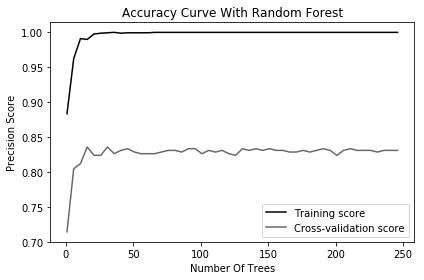

In [209]:
param_range=np.arange(1, 250, 5)
train_scores,val_scores=validation_curve(RandomForestClassifier(),train.iloc[:,4:-2],train.iloc[:,-1],\
                                        param_name="n_estimators",param_range=param_range,\
                                        cv=5,scoring='accuracy',n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, val_mean, label="Cross-validation score", color="dimgrey")

plt.title("Accuracy Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Precision Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [210]:
print(list(zip(val_mean,param_range))[:15]) #looks like n_esitmators plateaued at ~30

[(0.7148857615335291, 1), (0.8051412372177786, 6), (0.8123988390536937, 11), (0.8361536903918193, 16), (0.8241915561405285, 21), (0.824275589753974, 26), (0.8360976679828557, 31), (0.8265444973169991, 36), (0.8313350882521682, 41), (0.8336593432553745, 46), (0.8289254496979513, 51), (0.8265164861125172, 56), (0.8266011946947452, 61), (0.8265725085214808, 66), (0.8289534609024333, 71)]


3) max_depth

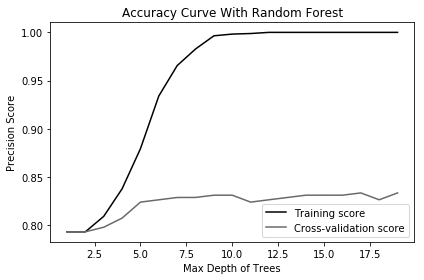

In [211]:
param_range=np.arange(1, 20)
train_scores,val_scores=validation_curve(RandomForestClassifier(n_estimators=100),train.iloc[:,4:-2],train.iloc[:,-1],\
                                        param_name="max_depth",param_range=param_range,\
                                        cv=5,scoring='accuracy',n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, val_mean, label="Cross-validation score", color="dimgrey")

plt.title("Accuracy Curve With Random Forest")
plt.xlabel("Max Depth of Trees")
plt.ylabel("Precision Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show() #Looks like max_depth=10

Now let's use the best model we have so far to apply to test data, and compare with the default settings.

In [219]:
best_rf=RandomForestClassifier(n_estimators=30,max_depth=10,random_state=0,n_jobs=-1)
print(cross_val_score(best_rf,train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())
print(cross_val_score(RandomForestClassifier(),train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())
best_rf.fit(train.iloc[:,4:-2],train.iloc[:,-1])
print(best_rf.score(test.iloc[:,4:-2],test.iloc[:,-1]))
default_rf=RandomForestClassifier(random_state=0)
default_rf.fit(train.iloc[:,4:-2],train.iloc[:,-1])
print(default_rf.score(test.iloc[:,4:-2],test.iloc[:,-1]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8146909827760891
0.8052009456264776


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8207547169811321
0.8113207547169812


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It looks like though the current best model has better behavior in cross-validation (0.815 vs 0.805). The superiority also show in the test data set compared to default model (0.821 vs 0.811). But this is just first step, we only looked at some hyperparameters __individually__, we can do better by looking at the __combinations__ of hyperparameters.

Next, we will use random search/grid search to search for optimal combination of hyperparameters: 

Let's first try random search:

In [220]:
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# build a classifier
clf = RandomForestClassifier(n_estimators=30)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 10, 30, None],
              "max_features": sp_randint(1, 100),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(train.iloc[:,4:-2],train.iloc[:,-1])
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 19.32 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.846 (std: 0.012)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 77, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.846 (std: 0.027)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 78, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.841 (std: 0.016)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 90, 'min_samples_split': 9}



Not bad! By randomly searching, we can reach a mean validation score of 0.846, already better than our previous best model (0.815).

Then use GridSearch to do a rather more comprehensive search:

In [221]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, 10, 30, None],
              "max_features": [1, 3, 10, 30, 100],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(train.iloc[:,4:-2],train.iloc[:,-1])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 143.90 seconds for 240 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.850 (std: 0.024)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 100, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.850 (std: 0.015)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 100, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.846 (std: 0.013)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 100, 'min_samples_split': 2}



We can see that the mean validation score improved a bit more. Now, again let's evaluate the currect best model on the test data.

In [224]:
best_rf=RandomForestClassifier(n_estimators=30,random_state=0,bootstrap=True,criterion='gini',\
                               max_features=100,n_jobs=-1)
print(cross_val_score(best_rf,train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())
print(cross_val_score(RandomForestClassifier(),train.iloc[:,4:-2],train.iloc[:,-1],scoring='accuracy').mean())
best_rf.fit(train.iloc[:,4:-2],train.iloc[:,-1])
print(best_rf.score(test.iloc[:,4:-2],test.iloc[:,-1]))
default_rf=RandomForestClassifier(random_state=0)
default_rf.fit(train.iloc[:,4:-2],train.iloc[:,-1])
print(default_rf.score(test.iloc[:,4:-2],test.iloc[:,-1]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.819452887537994
0.8123606889564337


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8584905660377359
0.8113207547169812


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We can see that the current best model is significantly better than the default RandomForest model (0.858 vs 0.811). Let's save it.

In [0]:
filename = 'best_rf.sav'
pickle.dump(best_rf, open(filename, 'wb'))

Take a look at the top important features in this model.

In [226]:
important_feature_list=important_features(best_rf)
indexes,importance=zip(*important_feature_list)
print(train.columns.values[4:-2][list(indexes)])
print(importance)

['Mexican Restaurant' 'Vietnamese Restaurant' 'Chinese Restaurant'
 'Italian Restaurant' 'Asian Restaurant' 'Seafood Restaurant'
 'American Restaurant'
 'ACS Demographics/Race and ethnicity/Not Hispanic or Latino: Asian alone/Percentage'
 'ACS Housing/Value of owner-occupied housing units/$300,000 to $399,999/Percentage'
 'ACS Demographics/Population by age range/Female: 30 to 34 years/Percentage']
(0.08779420803284978, 0.043148749836112645, 0.03668969889921046, 0.031918687890482016, 0.025279727694509854, 0.02296926495708271, 0.022627611357803785, 0.019787979782027877, 0.016748919484651275, 0.016726305460935433)


####2. Logistic Regression

Next, we used another widely used model for classification: logistic regression.

Search best hyperparameters using GridSearchCV.

In [0]:
from sklearn import linear_model, datasets

In [227]:
logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_logistic = gridsearch.fit(train.iloc[:,4:-2],train.iloc[:,-1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Then we can take a look at the selected hyperparamters.

In [228]:
print('Best Penalty:', best_logistic.best_estimator_.get_params()['penalty'])
print('Best C:', best_logistic.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.7825594022071245


And how does the best logistic model perform on test data?

In [229]:
best_logistic.score(test.iloc[:,4:-2],test.iloc[:,-1])

0.8301886792452831

Not better than Random Forest model, but still give pretty decent results. Let's save it.

In [0]:
filename = 'best_logistic.sav'
pickle.dump(best_logistic, open(filename, 'wb'))

####3. Support Vector Machines

Finally, let's try support vecotr machines.

In [231]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
svc.fit(train.iloc[:,4:-2],train.iloc[:,-1])
svc.score(test.iloc[:,4:-2],test.iloc[:,-1])

0.8018867924528302

We will use grid search to find optimal selection of hyperparameters.

In [232]:
svc = SVC(gamma=1)
kernel = ['linear','poly', 'rbf', 'sigmoid']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, kernel=kernel)
gridsearch = GridSearchCV(svc, hyperparameters, cv=5, verbose=0)
best_svc = gridsearch.fit(train.iloc[:,4:-2],train.iloc[:,-1])
best_svc.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 2.7825594022071245, 'kernel': 'linear'}

Apply the best SVM model to the test data.

In [233]:
best_svc.score(test.iloc[:,4:-2],test.iloc[:,-1])

0.8018867924528302

This really does not make a difference compared to default model. 

In [0]:
filename = 'best_svm.sav'
pickle.dump(best_svc, open(filename, 'wb'))

we

###Finally let's use the models we built to predict label for Houston neighborhoods, and interpret our findings.

From the results of the different models, we can see that RandomForest model gives the highest accuracy score on test data (0.86), followed by Logistic Regression (0.83), the last one is SVM (0.80).

We will apply the top two methods on the Houston neighborhood data and see if the two methods can give consistent predictions.

Let's do RandomForest model first.

In [0]:
best_rf_prediction=best_rf.predict(Houston_combined_df.iloc[:,4:])
best_rf_predict_prob=best_rf.predict_proba(Houston_combined_df.iloc[:,4:])

In [236]:
Houston_neighbor_list=Houston_combined_df['Neighborhood']
Houston_neighbor_score={}
#sort the neighborhoods by probability of label '1'
for idx,prob in enumerate(best_rf_predict_prob):
  Houston_neighbor_score[Houston_neighbor_list[idx]]=prob[1]
print(sorted(Houston_neighbor_score.items(),key=lambda x: x[1],reverse=True))

[('South Belt / Ellington', 0.8666666666666667), ('Alief', 0.8666666666666667), ('Clear Lake', 0.8333333333333334), ('Spring Branch East', 0.8), ('Spring Branch Central', 0.8), ('Spring Branch West', 0.8), ('Westbranch', 0.5666666666666667), ('Westchase', 0.5666666666666667), ('Fondren Gardens', 0.4666666666666667), ('Pleasantville Area', 0.43333333333333335), ('Medical Center Area', 0.36666666666666664), ('Edgebrook Area', 0.3333333333333333), ('East Houston', 0.3333333333333333), ('Settegast', 0.23333333333333334), ('Northside Village', 0.2), ('South Main', 0.2), ('Clinton Park Tri-Community', 0.16666666666666666), ('Denver Harbor / Port Houston', 0.16666666666666666), ('South Park', 0.16666666666666666), ('Sunnyside', 0.13333333333333333), ('Greenway / Upper Kirby Area', 0.1), ('Hunterwood', 0.1), ('Gulfton', 0.1), ('University Place', 0.1), ('Afton Oaks / River Oaks Area', 0.1), ('Fourth Ward', 0.06666666666666667), ('Kashmere Gardens', 0.06666666666666667), ('Pecan Park', 0.066666

Then the logistic model.

In [237]:
best_logistic_prediction=best_logistic.predict(Houston_combined_df.iloc[:,4:])
best_logistic_predict_prob=best_logistic.predict_proba(Houston_combined_df.iloc[:,4:])
Houston_neighbor_score_logit={}
#sort the neighborhoods by probability of label '1'
for idx,prob in enumerate(best_logistic_predict_prob):
  Houston_neighbor_score_logit[Houston_neighbor_list[idx]]=prob[1]
print(sorted(Houston_neighbor_score_logit.items(),key=lambda x: x[1],reverse=True))

[('Spring Branch East', 0.9929330238698919), ('Spring Branch Central', 0.9929330238698919), ('Spring Branch West', 0.9929330238698919), ('Clear Lake', 0.9756601703943616), ('Alief', 0.7355323225936168), ('South Belt / Ellington', 0.7240096825780603), ('Fondren Gardens', 0.5290066524049447), ('Gulfton', 0.5119543227828857), ('East Houston', 0.5028231300211746), ('Pleasantville Area', 0.18903835629782345), ('Medical Center Area', 0.17535766009558437), ('Sunnyside', 0.16708665146646381), ('Westchase', 0.13702676716077156), ('Settegast', 0.12386190280576122), ('Golfcrest / Bellfort / Reveille', 0.11223024381426207), ('Memorial', 0.10728816775426661), ('Denver Harbor / Port Houston', 0.0776021306646545), ('Lake Houston', 0.07605758754773788), ('Edgebrook Area', 0.07332949812067989), ('Lazy Brook / Timbergrove', 0.07133328787739587), ('Kashmere Gardens', 0.07042066149027484), ('Independence Heights', 0.06137886630786788), ('Westbranch', 0.05749791060524399), ('Fourth Ward', 0.054932727333756

We can see that the two models give very similar predictions on neighborhoods that are suitable for restaurant businesses. And we will use the __RandomForest__ model as our choice since it gives the highest accuracy on test data.

In [238]:
Houston_neighbor_score_df=pd.DataFrame({'Neighborhood':Houston_neighbor_list,\
                                        'Score':[x[1] for x in best_rf_predict_prob]})
Houston_neighbor_score_df.head()

,Neighborhood,Score
0,Fourth Ward,0.066667
1,Pleasantville Area,0.433333
2,Spring Branch East,0.800000
3,Lake Houston,0.033333
4,South Belt / Ellington,0.866667


In [0]:
Houston_neighbor_score_df.to_csv('Houston_community_scores.csv',index=False)

Now let's try to visualize the results on the map.

In [0]:
import folium

In [0]:
m = folium.Map(location=[29.7604, -95.3698])

In [176]:
m

Now let's plot a choropleth map indicating the scores.

In [242]:
houston_geo='houston.geojson'
m.choropleth(
    geo_data=houston_geo,
    data=Houston_neighbor_score_df,
    columns=['Neighborhood','Score'],
    key_on='feature.properties.name',
    fill_color='YlOrRd'
    )
m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


We can see that, as we were unable to annotate many regions with social-economic data, there are a few neighborhoods missing in the map. But the top candidates are marked in red, with 3 regions: northwest, southwest and southeast. All of them are satellite cities that are famous for good living conditions.

So now, let's dig deeper to have a better understanding about the predictions. First pick out the top and bottom list of neighborhoods.

In [258]:
top_neighbor_list=[x[0] for x in Houston_neighbor_score.items() if x[1]>0.7]
print(top_neighbor_list)
bottom_neighbor_list=[x[0] for x in Houston_neighbor_score.items() if x[1]<0.1]
print(bottom_neighbor_list)

['Spring Branch East', 'South Belt / Ellington', 'Spring Branch Central', 'Alief', 'Clear Lake', 'Spring Branch West']
['Fourth Ward', 'Lake Houston', 'Memorial', 'Independence Heights', 'Golfcrest / Bellfort / Reveille', 'Lazy Brook / Timbergrove', 'Kashmere Gardens', 'Westbury', 'Hidden Valley', 'Pecan Park']


Then let's take a look what features make these neighborhoods stand out. First, recall the feature importance of our RandomForest model.

In [246]:
important_feature_list=important_features(best_rf)
indexes,importance=zip(*important_feature_list)
important_feature_list=train.columns.values[4:-2][list(indexes)]
print(important_feature_list)
print(importance)

['Mexican Restaurant' 'Vietnamese Restaurant' 'Chinese Restaurant'
 'Italian Restaurant' 'Asian Restaurant' 'Seafood Restaurant'
 'American Restaurant'
 'ACS Demographics/Race and ethnicity/Not Hispanic or Latino: Asian alone/Percentage'
 'ACS Housing/Value of owner-occupied housing units/$300,000 to $399,999/Percentage'
 'ACS Demographics/Population by age range/Female: 30 to 34 years/Percentage']
(0.08779420803284978, 0.043148749836112645, 0.03668969889921046, 0.031918687890482016, 0.025279727694509854, 0.02296926495708271, 0.022627611357803785, 0.019787979782027877, 0.016748919484651275, 0.016726305460935433)


Let's look at the important features in top_neighbor_list and bottom_neighbor_list. And compare to see how the differences can explain the prediction.

In [255]:
Houston_combined_df[Houston_combined_df['Neighborhood'].isin(top_neighbor_list)][important_feature_list].mean()

Mexican Restaurant                                                                    0.440476
Vietnamese Restaurant                                                                 0.007937
Chinese Restaurant                                                                    0.000000
Italian Restaurant                                                                    0.000000
Asian Restaurant                                                                      0.000000
Seafood Restaurant                                                                    0.000000
American Restaurant                                                                   0.000000
ACS Demographics/Race and ethnicity/Not Hispanic or Latino: Asian alone/Percentage    0.153000
ACS Housing/Value of owner-occupied housing units/$300,000 to $399,999/Percentage     0.051500
ACS Demographics/Population by age range/Female: 30 to 34 years/Percentage            0.076333
dtype: float64

In [259]:
Houston_combined_df[Houston_combined_df['Neighborhood'].isin(bottom_neighbor_list)][important_feature_list].mean()

Mexican Restaurant                                                                    0.0000
Vietnamese Restaurant                                                                 0.0000
Chinese Restaurant                                                                    0.0000
Italian Restaurant                                                                    0.0000
Asian Restaurant                                                                      0.0000
Seafood Restaurant                                                                    0.0000
American Restaurant                                                                   0.0000
ACS Demographics/Race and ethnicity/Not Hispanic or Latino: Asian alone/Percentage    0.1104
ACS Housing/Value of owner-occupied housing units/$300,000 to $399,999/Percentage     0.0466
ACS Demographics/Population by age range/Female: 30 to 34 years/Percentage            0.0718
dtype: float64

Interesting!
Here are some key findings: 

1) Regions with popular __Mexican restaurants__ can be considered as nice neighborhoods for restaurant businesses. Probably because popular Mexican restaurants are supported by high foot traffic and people would stay around the area before/after the meal.

2) The demographics in a neighborhood also provides some information: If a neighborhood has higher percentage of __Asian__, it indicates a better business for restaurants. Probably Asians love dining out more?

3) __Neighborhood housing__. If a neighborhood has more housing prices ranging 300k-400k dollars, it's a good indicator that this neighborhood is a great option for dining.

4) __Females in 30-34 years old__. A higher percentage of this demographic group is also a positive sign for restaurant business. Looks like ladies in their 30s make great impact on restaurant businesses.

##Conclusion<a name="conclusion"></a>

Based on the predictions from the best model: Random Forest model. We identified 3 areas as the top candidates for opening a restaurant: northwest (Spring Branch), southwest (Alief) and southeast (Clear Lake, South Belt/Ellington). These areas stand out because of already thriving restaurant business environment, high concentrate of Asian, healthy neighborhood housing and high concentration of young female group. 

A good example is the Spring Branch district. This neighborhood has many headquarters of oil and gas companies as well as good quality residential real estate. Besides, this area also has the biggest Korean town in Texas and has rich resources that are appealing to customers especially female customers.

##Discussion<a name="discussion"></a>

Here, we used 3 common classification methods to model the problem of selecting best neighborhood for a restaurant. There are several discussion points.

First, we were using a lot of information to depict neighborhoods in a metropolitan area. Eventually, in the best model, we identified a few important features covering demographic, economic and industry specific information. While some features are more straightforward, some are more subtle for example the young female group. These findings suggest that using data-driven models can help uncovering some predictors that may not be apparent.

Second, we did not use the absolute values such as count as potential features because different cities have different scales and using absolute values may introduce bias, instead, here we used percentage values as a standardized value.

Third, for the missing data, we did not choose to impute them. The reason is that some neighborhoods miss all of their social-economic data, and if there is no data for such neighborhoods because they are less established, it might indicate that there is a pattern for missing data.

Finally, the model we built here did not contain more specific considerations such as: the type of the restaurant, the budget, the crime rate, the competitive landscape etc. I believe a more sophisticated model can be built with these further considerations.